In [ ]:
!pip install -q colabcode

In [ ]:
!colabcode --port 10000  --mount_drive

--2020-09-15 11:00:46--  https://code-server.dev/install.sh
Resolving code-server.dev (code-server.dev)... 172.67.214.225, 104.31.76.39, 104.31.77.39, ...
Connecting to code-server.dev (code-server.dev)|172.67.214.225|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cdr/code-server/master/install.sh [following]
--2020-09-15 11:00:47--  https://raw.githubusercontent.com/cdr/code-server/master/install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11805 (12K) [text/plain]
Saving to: ‘install.sh’

install.sh          100%[===================>]  11.53K  --.-KB/s    in 0s      

2020-09-15 11:00:47 (49.2 MB/s) - ‘install.sh’ saved [11805/11805]

########################################################

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install fastai2
!pip install fastcore==0.1.35

     |████████████████████████████████| 184kB 6.9MB/s 
     |████████████████████████████████| 40kB 4.4MB/s 
  Found existing installation: fastcore 1.0.11
    Uninstalling fastcore-1.0.11:
      Successfully uninstalled fastcore-1.0.11


In [ ]:
#path='/content/gdrive/My Drive/Dog species/Images'
path= '/content/gdrive/My Drive/Dog species/dataset'

In [ ]:
from fastai2.vision.all import *

In [ ]:
dls = ImageDataLoaders.from_folder(path,train='train', valid='val', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224,flip_vert=True), device='cuda')

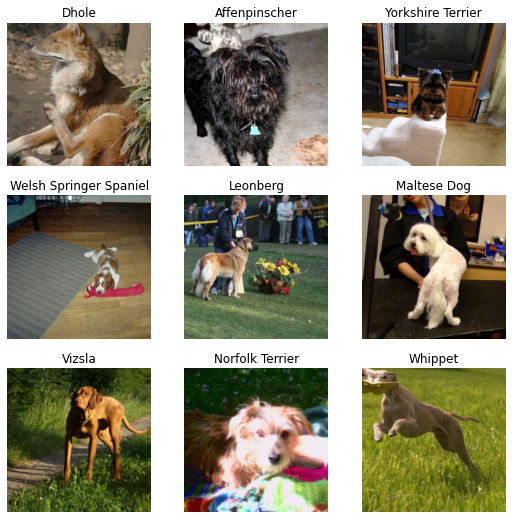

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

In [ ]:
learn_new = cnn_learner(dls, resnet50, metrics=[accuracy,error_rate])
learn_new.fine_tune(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.301785,0.606892,0.813930,0.186070,03:03


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.772712,0.542054,0.827363,0.172637,03:21
1,0.711798,0.565527,0.830348,0.169652,03:21
2,0.468496,0.468277,0.854726,0.145274,03:23
3,0.301720,0.440742,0.862189,0.137811,03:23


In [ ]:
!nvidia-smi

Tue Sep 15 06:48:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    29W /  70W |  10585MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.001737800776027143)

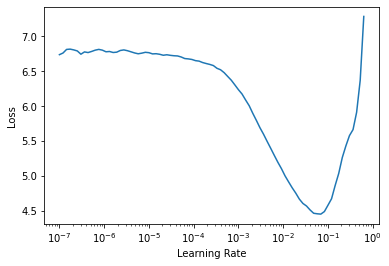

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.293664,0.649224,0.800000,08:21


epoch,train_loss,valid_loss,accuracy,time
0,0.799229,0.546132,0.833333,03:24
1,0.673929,0.533850,0.839801,03:26
2,0.455959,0.462469,0.863184,03:28
3,0.327419,0.449617,0.857711,03:31


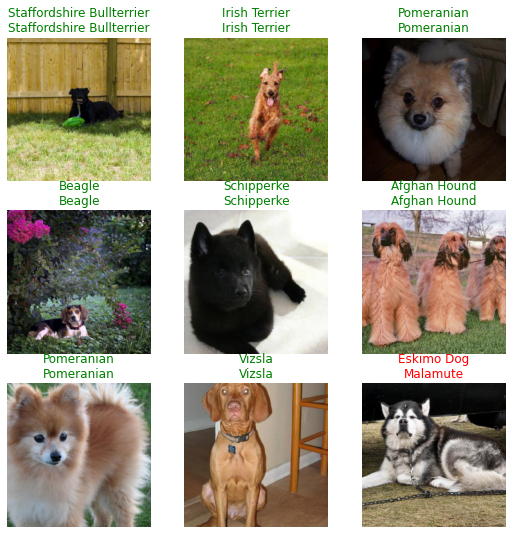

In [ ]:
learn.show_results()

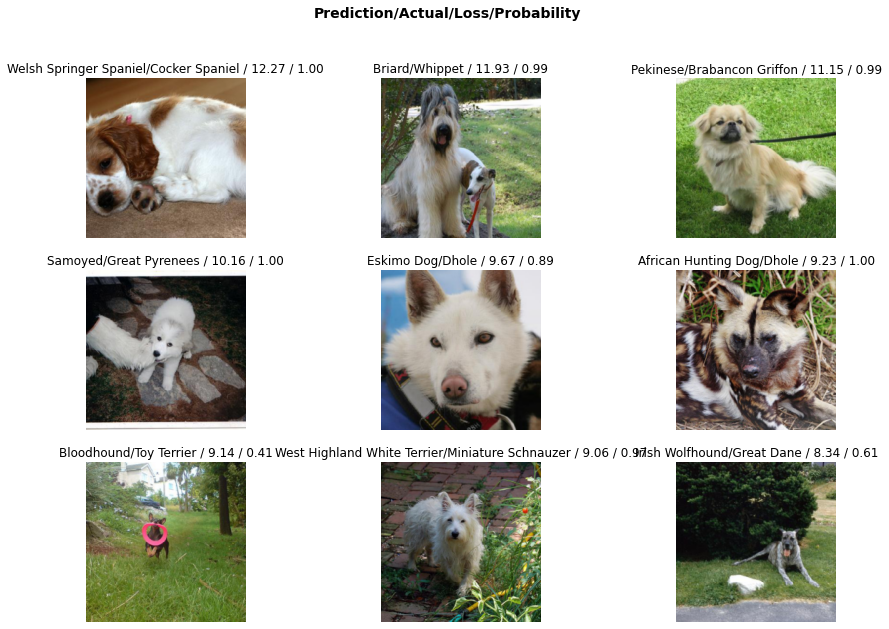

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
??predict

Object `predict` not found.


In [ ]:
dls_test = ImageDataLoaders.from_folder(path,train='test', item_tfms=Resize(460),  device='cuda')

In [ ]:
img = PILImage(PILImage.create('/content/gdrive/My Drive/Dog species/dataset/test/Toy Poodle/n02113624_8936.jpg').resize((224,224)))

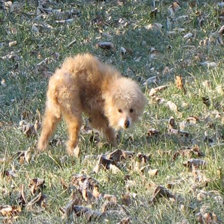

In [ ]:
img

In [ ]:
learn.predict(img)

('Pomeranian',
 tensor(87),
 tensor([2.5239e-04, 7.7415e-05, 8.1178e-04, 1.8327e-03, 9.2174e-05, 3.9047e-05,
         2.0372e-04, 8.2275e-05, 8.8806e-05, 1.2539e-04, 1.0942e-04, 5.3257e-05,
         1.5593e-04, 8.6891e-04, 2.4230e-04, 1.6226e-04, 5.2816e-04, 1.1587e-04,
         2.4315e-03, 8.0026e-04, 7.5210e-04, 1.3507e-04, 2.7338e-04, 1.0117e-04,
         2.1799e-04, 4.1658e-04, 1.9190e-03, 5.4271e-05, 3.6858e-04, 9.2565e-05,
         2.1001e-01, 4.5518e-05, 8.5757e-04, 5.3645e-04, 3.2107e-04, 6.2403e-03,
         1.2491e-02, 1.4298e-03, 4.1472e-04, 3.5066e-05, 3.8740e-04, 1.2455e-05,
         2.0954e-05, 8.7470e-04, 7.8915e-05, 4.3426e-04, 1.3283e-04, 1.5770e-05,
         6.2041e-05, 2.0444e-02, 9.6217e-04, 1.1343e-04, 4.4335e-04, 4.5746e-04,
         5.7729e-04, 1.0050e-04, 1.9933e-03, 2.3504e-04, 6.4166e-04, 7.8086e-05,
         1.7912e-04, 3.0229e-04, 5.3621e-04, 4.5978e-05, 3.5303e-03, 9.4539e-04,
         7.8682e-04, 1.7116e-04, 1.6735e-03, 1.1578e-03, 5.3667e-03, 1.0809e-03,


In [ ]:
learn.export()

In [ ]:

AssertionError: Expected an input of type in 
  - <class 'pathlib.PosixPath'>
  - <class 'pathlib.Path'>
  - <class 'str'>
  - <class 'torch.Tensor'>
  - <class 'numpy.ndarray'>
  - <class 'bytes'>
  - <class 'fastai2.vision.core.PILImage'>

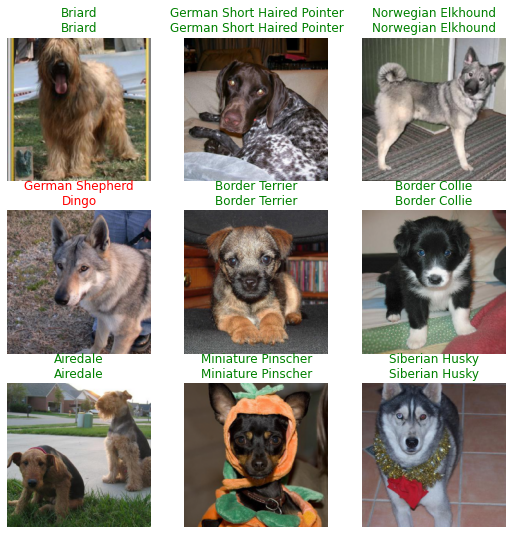

In [ ]:
learn_new.show_results()

In [ ]:
learn_new.predict(img)

('Miniature Poodle',
 tensor(76),
 tensor([5.6728e-05, 2.0091e-04, 1.9702e-03, 1.4999e-02, 1.4655e-04, 1.6161e-04,
         6.0077e-05, 5.9489e-04, 2.9355e-04, 3.7837e-04, 1.3821e-03, 3.6373e-04,
         1.3219e-04, 7.4556e-04, 4.3727e-04, 2.8426e-04, 1.1160e-04, 7.3950e-04,
         9.1848e-04, 1.7783e-04, 7.5066e-04, 4.1162e-04, 6.0565e-05, 2.2513e-03,
         7.9379e-04, 9.6811e-05, 9.4303e-04, 5.7535e-05, 6.2119e-04, 1.1332e-03,
         1.7239e-02, 1.4863e-04, 9.2990e-04, 1.5158e-03, 4.6123e-03, 2.1637e-02,
         9.1337e-03, 1.7994e-02, 1.1793e-04, 1.4438e-03, 1.7316e-03, 2.3246e-04,
         1.1875e-04, 3.7292e-04, 3.7151e-04, 1.8541e-03, 2.4615e-04, 1.1802e-03,
         7.1128e-05, 7.4552e-02, 3.7763e-03, 7.7523e-05, 7.3642e-04, 1.1487e-04,
         7.8115e-04, 4.1887e-05, 4.1542e-03, 2.0225e-03, 3.2376e-03, 4.7351e-05,
         3.0933e-04, 3.1389e-04, 6.8671e-04, 4.5278e-04, 8.0852e-04, 7.3255e-04,
         4.1333e-03, 2.7035e-04, 5.7038e-03, 2.4032e-03, 1.1237e-03, 1.5421

In [ ]:
learn_new.export('final.pth')

In [ ]:
learn_l= load_learner('/content/gdrive/My Drive/Dog species/dataset/final.pth')

In [ ]:
learn_l.predict(img)

('Miniature Poodle',
 tensor(76),
 tensor([5.6728e-05, 2.0091e-04, 1.9702e-03, 1.4999e-02, 1.4655e-04, 1.6161e-04,
         6.0077e-05, 5.9489e-04, 2.9355e-04, 3.7837e-04, 1.3821e-03, 3.6373e-04,
         1.3219e-04, 7.4556e-04, 4.3727e-04, 2.8426e-04, 1.1160e-04, 7.3950e-04,
         9.1848e-04, 1.7783e-04, 7.5066e-04, 4.1162e-04, 6.0565e-05, 2.2513e-03,
         7.9380e-04, 9.6811e-05, 9.4303e-04, 5.7535e-05, 6.2119e-04, 1.1332e-03,
         1.7239e-02, 1.4863e-04, 9.2991e-04, 1.5158e-03, 4.6123e-03, 2.1637e-02,
         9.1336e-03, 1.7994e-02, 1.1793e-04, 1.4438e-03, 1.7315e-03, 2.3246e-04,
         1.1875e-04, 3.7291e-04, 3.7151e-04, 1.8541e-03, 2.4614e-04, 1.1802e-03,
         7.1128e-05, 7.4552e-02, 3.7762e-03, 7.7523e-05, 7.3642e-04, 1.1487e-04,
         7.8115e-04, 4.1887e-05, 4.1542e-03, 2.0225e-03, 3.2376e-03, 4.7350e-05,
         3.0933e-04, 3.1389e-04, 6.8670e-04, 4.5278e-04, 8.0852e-04, 7.3256e-04,
         4.1333e-03, 2.7036e-04, 5.7038e-03, 2.4033e-03, 1.1237e-03, 1.5421

In [ ]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=30)